# **Priliminary data analysis of Arena HUBs**

## Data are the logs from a remote Arena system, access control system that unlocks doors.

Initial files contain the following records:

*_id –  record ID

_uuid – device identifier, from hardware ( IMEI-like value).

_timestamp – event time (UTC)

rpc – the type of action/event (always “unlock” in the file).

_ack_timestamp – acknowledgement time (when the system confirmed the event).

_ack_status – acknowledgement result (0 means success, empty means not acknowledged).*

Initial second dataset contain diagnostic telemetry and metadata 
It’s recording resets, uptime, firmware versions, and network signal strength.

*_id – unique row identifier 

_uuid – device identifier 

timestamp – when the record was captured

just_booted – t means the device had just restarted when the log was recorded.

reset_reason – numeric code for why the device reset (e.g., 0, 2, 16 … probably mapped to watchdog, power cycle, etc.).

uptime – how many seconds the device had been running before the log.

fw_version – firmware version running on the device.

modem_fw_version – modem firmware version 

rsrp – signal strength (Reference Signal Received Power, typical for LTE/5G modules).
*


In [169]:
import pandas as pd

# Load your CSV
file_path = "Enhets data - Katarinasstädtjänst Enhet Grind - RSRP.csv"
df = pd.read_csv(file_path)

# Replace 'date' column with merged datetime
df['date'] = pd.to_datetime(
    df['date'].astype(str) + " " + df['time'].astype(str),
    errors='coerce'
)

# Drop the separate 'time' column
df = df.drop(columns=['time'])

# Optionally rename 'date' → 'datetime'
df = df.rename(columns={'date': 'timestamp'})

# Save to new CSV
output_file = "Enhets data - Katarinasstädtjänst Enhet Grind - RSRP_corr.csv"
df.to_csv(output_file, index=False)

print(f"Saved as: {output_file}")

# Load your CSV
file_path = "Enhets data - SMRTEC huvudEntre - RSRP.csv"
df = pd.read_csv(file_path)

# Replace 'date' column with merged datetime
df['date'] = pd.to_datetime(
    df['date'].astype(str) + " " + df['time'].astype(str),
    errors='coerce'
)

# Drop the separate 'time' column
df = df.drop(columns=['time'])

# Optionally rename 'date' → 'datetime'
df = df.rename(columns={'date': 'timestamp'})

# Save to new CSV
output_file = "Enhets data - SMRTEC huvudEntre - RSRP.csv_corr.csv"
df.to_csv(output_file, index=False)

print(f"Saved as: {output_file}")

# Load your CSV
file_path = "Enhets data - Varbergs boxningsklubb - RSRP.csv"
df = pd.read_csv(file_path)

# Replace 'date' column with merged datetime
df['date'] = pd.to_datetime(
    df['date'].astype(str) + " " + df['time'].astype(str),
    errors='coerce'
)

# Drop the separate 'time' column
df = df.drop(columns=['time'])

# Optionally rename 'date' → 'datetime'
df = df.rename(columns={'date': 'timestamp'})

# Save to new CSV
output_file = "Enhets data - Varbergs boxningsklubb - RSRP.csv_corr.csv"
df.to_csv(output_file, index=False)

print(f"Saved as: {output_file}")

Saved as: Enhets data - Katarinasstädtjänst Enhet Grind - RSRP_corr.csv
Saved as: Enhets data - SMRTEC huvudEntre - RSRP.csv_corr.csv
Saved as: Enhets data - Varbergs boxningsklubb - RSRP.csv_corr.csv


In [170]:
import pandas as pd

# Load your CSV
file_path = "Enhets data - Katarinasstädtjänst Enhet Grind - Unlock.csv"
df = pd.read_csv(file_path)

# Merge date1 + time1 into datetime1
df['_timestamp'] = pd.to_datetime(
    df['date1'].astype(str) + " " + df['time1'].astype(str),
    errors='coerce'
)

# Merge date2 + time2 into datetime2
df['_ack_timestamp'] = pd.to_datetime(
    df['date2'].astype(str) + " " + df['time2'].astype(str),
    errors='coerce'
)

# Drop original date/time columns
df = df.drop(columns=['date1', 'time1', 'date2', 'time2'])

# Reorder columns
df = df[['  _id ', ' _uuid ', '_timestamp', 'rpc   ', '_ack_timestamp', '_ack_status']]

# Save to new CSV
output_file = "Enhets data - Katarinasstädtjänst Enhet Grind - Unlock_corr.csv"
df.to_csv(output_file, index=False)

print(f"Saved as: {output_file}")

import pandas as pd

# Load your CSV
file_path = "Enhets data - SMRTEC huvudEntre - Unlock.csv"
df = pd.read_csv(file_path)

# Merge date1 + time1 into datetime1
df['_timestamp'] = pd.to_datetime(
    df['date1'].astype(str) + " " + df['time1'].astype(str),
    errors='coerce'
)

# Merge date2 + time2 into datetime2
df['_ack_timestamp'] = pd.to_datetime(
    df['date2'].astype(str) + " " + df['time2'].astype(str),
    errors='coerce'
)

# Drop original date/time columns
df = df.drop(columns=['date1', 'time1', 'date2', 'time2'])

# Reorder columns
df = df[['  _id ', ' _uuid ', '_timestamp', 'rpc   ', '_ack_timestamp', '_ack_status']]

# Save to new CSV
output_file = "Enhets data - SMRTEC huvudEntre - Unlock_corr.csv"
df.to_csv(output_file, index=False)

print(f"Saved as: {output_file}")

Saved as: Enhets data - Katarinasstädtjänst Enhet Grind - Unlock_corr.csv
Saved as: Enhets data - SMRTEC huvudEntre - Unlock_corr.csv


In [171]:
file_path = "Enhets data - Katarinasstädtjänst Enhet Grind - Unlock.csv"
df = pd.read_csv(file_path)

print(df.columns.tolist())

['  _id ', ' _uuid ', 'date1', 'time1', 'rpc   ', 'date2', 'time2', '_ack_status']


In [172]:
import pandas as pd

# Load both CSVs
rsrp = pd.read_csv("Enhets data - Katarinasstädtjänst Enhet Grind - RSRP_corr.csv")
unlock = pd.read_csv("Enhets data - Katarinasstädtjänst Enhet Grind - Unlock_corr.csv")

# Combine them vertically
combined = pd.concat([rsrp, unlock], ignore_index=True)

# Save result
combined.to_csv("Enhets data - Katarinasstädtjänst Enhet Grind _combined.csv", index=False)
df = pd.read_csv ("Enhets data - Katarinasstädtjänst Enhet Grind _combined.csv")
df.head()
df.shape    

# Load both CSVs
rsrp = pd.read_csv("Enhets data - SMRTEC huvudEntre - RSRP.csv_corr.csv")
unlock = pd.read_csv("Enhets data - SMRTEC huvudEntre - Unlock_corr.csv")

# Combine them vertically
combined = pd.concat([rsrp, unlock], ignore_index=True)

# Save result
combined.to_csv("Enhets data - SMRTEC huvudEntre_combined.csv", index=False)
   
# Load both CSVs
rsrp = pd.read_csv("Enhets data - Varbergs boxningsklubb - RSRP.csv_corr.csv")
unlock = pd.read_csv("Enhets data - Varbergs boxningsklubb - Unlock.csv")

# Combine them vertically
combined = pd.concat([rsrp, unlock], ignore_index=True)

# Save result
combined.to_csv("Enhets data - Varbergs boxningsklubb_combined.csv", index=False)
   
   

In [173]:
import pandas as pd
import os
from glob import glob

# Set input and output directories
input_folder = '3_enheterna_input_folder/'   # Replace with your folder path
output_folder = '3_enheterna_output_folder/'  # Folder to save updated CSVs

# Create output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Get all CSV files in the input folder
csv_files = glob(os.path.join(input_folder, '*.csv'))

# Process each file
for file_path in csv_files:
    try:
        # Read CSV
        df = pd.read_csv(file_path)
        df.columns = df.columns.str.strip()

        # Convert to datetime
        df['_timestamp'] = pd.to_datetime(df['_timestamp'], errors='coerce')
        df['_ack_timestamp'] = pd.to_datetime(df['_ack_timestamp'], errors='coerce')

        # Calculate response time
        df['response_time_seconds'] = (
            df['_ack_timestamp'] - df['_timestamp']
        ).dt.total_seconds()

        # Build output file path
        filename = os.path.basename(file_path)
        output_path = os.path.join(output_folder, filename)

        # Save to output file
        df.to_csv(output_path, index=False)

        print(f"Processed: {filename}")

    except Exception as e:
        print(f"Failed to process {file_path}: {e}")


Processed: Enhets data - Katarinasstädtjänst Enhet Grind _combined.csv
Processed: Enhets data - Katarinasstädtjänst Enhet Grind _combined_with_response_time.csv
Processed: Enhets data - SMRTEC huvudEntre_combined.csv
Processed: Enhets data - Varbergs boxningsklubb_combined.csv


In [174]:
import pandas as pd

# Load the CSV file
input_file = '3_enheterna_input_folder/Enhets data - Katarinasstädtjänst Enhet Grind _combined.csv'  # Replace with your actual file path
output_file = '3_enheterna_input_folder/Enhets data - Katarinasstädtjänst Enhet Grind _combined_with_response_time.csv'  # Output file

# Read the CSV
df = pd.read_csv(input_file)

# Clean column names
df.columns = df.columns.str.strip()

# Convert timestamp columns to datetime
df['_timestamp'] = pd.to_datetime(df['_timestamp'], errors='coerce')
df['_ack_timestamp'] = pd.to_datetime(df['_ack_timestamp'], errors='coerce')

# Calculate response time in seconds
df['response_time_seconds'] = (
    df['_ack_timestamp'] - df['_timestamp']
).dt.total_seconds()

# Save to a new CSV file
df.to_csv(output_file, index=False)

print(f"Response time added. Saved to: {output_file}")


Response time added. Saved to: 3_enheterna_input_folder/Enhets data - Katarinasstädtjänst Enhet Grind _combined_with_response_time.csv


In [175]:
file_path = "3_enheterna_output_folder/Enhets data - SMRTEC huvudEntre_combined.csv"  # adjust path if needed
df = pd.read_csv(file_path)
print(df.columns.tolist())
df.shape

['_id', '_uuid', 'timestamp', 'just_booted', 'reset_reason', 'uptime', 'fw_version', 'modem_fw_version', 'rsrp', '_timestamp', 'rpc', '_ack_timestamp', '_ack_status', 'response_time_seconds']


(1050, 14)

In [176]:
file_path = "3_enheterna_output_folder/Enhets data - Katarinasstädtjänst Enhet Grind _combined.csv"  # adjust path if needed
df = pd.read_csv(file_path)
print(df.columns.tolist())
df.shape 

['_id', '_uuid', 'timestamp', 'just_booted', 'reset_reason', 'uptime', 'fw_version', 'modem_fw_version', 'rsrp', '_timestamp', 'rpc', '_ack_timestamp', '_ack_status', 'response_time_seconds']


(2687, 14)

In [177]:
file_path = "3_enheterna_output_folder/Enhets data - Varbergs boxningsklubb_combined.csv"  # adjust path if needed
df = pd.read_csv(file_path)
print(df.columns.tolist())
df.shape


['_id', '_uuid', 'timestamp', 'just_booted', 'reset_reason', 'uptime', 'fw_version', 'modem_fw_version', 'rsrp', '_timestamp', 'rpc', '_ack_timestamp', '_ack_status', 'response_time_seconds']


(1466, 14)


===== RESPONSE TIME SUMMARY =====
count    765.000000
mean       0.909926
std        1.923358
min        0.123102
25%        0.323860
50%        0.679821
75%        0.957693
max       44.291426
Name: response_time_seconds, dtype: float64


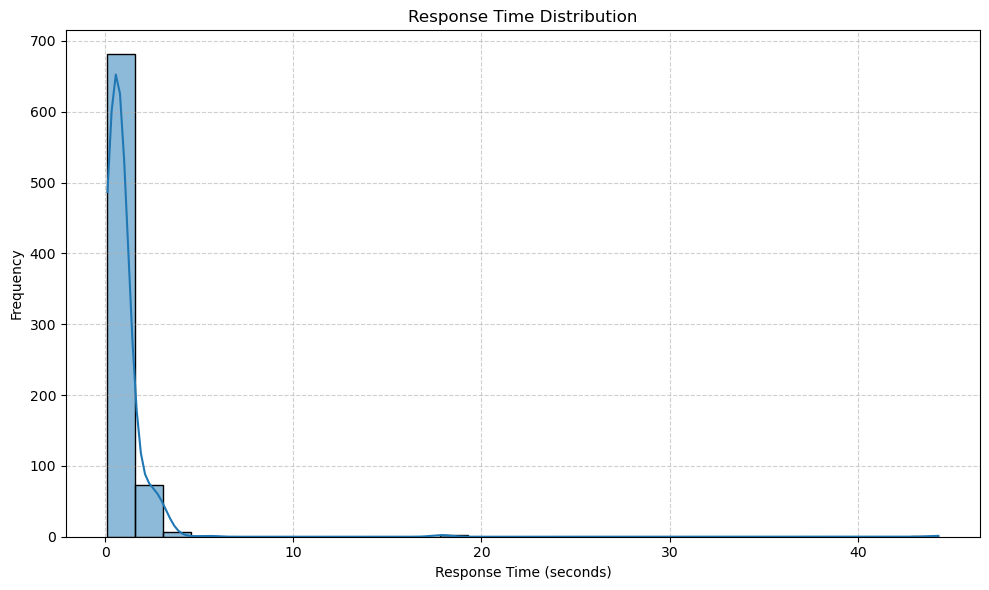

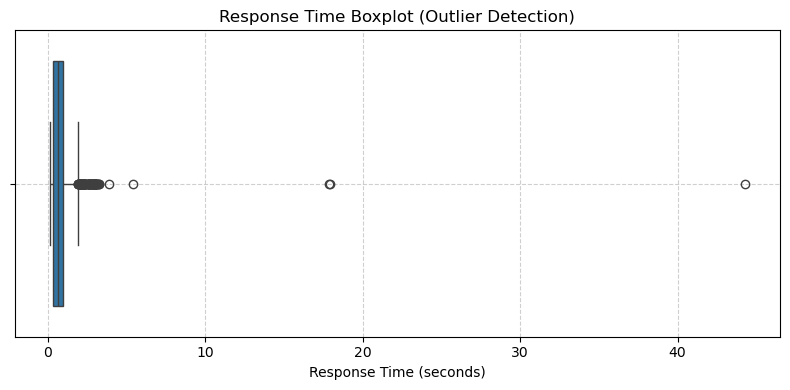

In [178]:
# ==============================================
# Response Time Distribution Analysis
# ==============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Data ---
file_path = "3_enheterna_output_folder/Enhets data - SMRTEC huvudEntre_combined.csv"  # adjust path if needed
df = pd.read_csv(file_path)

# --- Data Cleaning ---
# Focus on RPC entries that have response times
df_rpcs = df[df['response_time_seconds'].notna()].copy()

# Convert response_time_seconds to numeric (if not already)
df_rpcs['response_time_seconds'] = pd.to_numeric(df_rpcs['response_time_seconds'], errors='coerce')

# Drop invalid or zero values
df_rpcs = df_rpcs[df_rpcs['response_time_seconds'] > 0]

# --- Summary Statistics ---
summary = df_rpcs['response_time_seconds'].describe()
print("\n===== RESPONSE TIME SUMMARY =====")
print(summary)

# --- Plot Distribution ---
plt.figure(figsize=(10, 6))
sns.histplot(df_rpcs['response_time_seconds'], bins=30, kde=True)
plt.title('Response Time Distribution')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Optional: Boxplot for Outliers ---
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_rpcs['response_time_seconds'])
plt.title('Response Time Boxplot (Outlier Detection)')
plt.xlabel('Response Time (seconds)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [179]:
# ==============================================
#  Response Time Distribution Analysis VARBERGS
# ==============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Data ---
file_path = "3_enheterna_output_folder/Enhets data - Varbergs boxningsklubb_combined.csv"  # adjust path if needed
df = pd.read_csv(file_path)
print(df.columns.tolist())
df.shape

['_id', '_uuid', 'timestamp', 'just_booted', 'reset_reason', 'uptime', 'fw_version', 'modem_fw_version', 'rsrp', '_timestamp', 'rpc', '_ack_timestamp', '_ack_status', 'response_time_seconds']


(1466, 14)

In [180]:
# ==============================================
#  Response Time Distribution Analysis GRIND
# ==============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Data ---
file_path = "3_enheterna_output_folder/Enhets data - Katarinasstädtjänst Enhet Grind _combined.csv"  
df = pd.read_csv(file_path)
print(df.columns.tolist())
df.shape 

['_id', '_uuid', 'timestamp', 'just_booted', 'reset_reason', 'uptime', 'fw_version', 'modem_fw_version', 'rsrp', '_timestamp', 'rpc', '_ack_timestamp', '_ack_status', 'response_time_seconds']


(2687, 14)

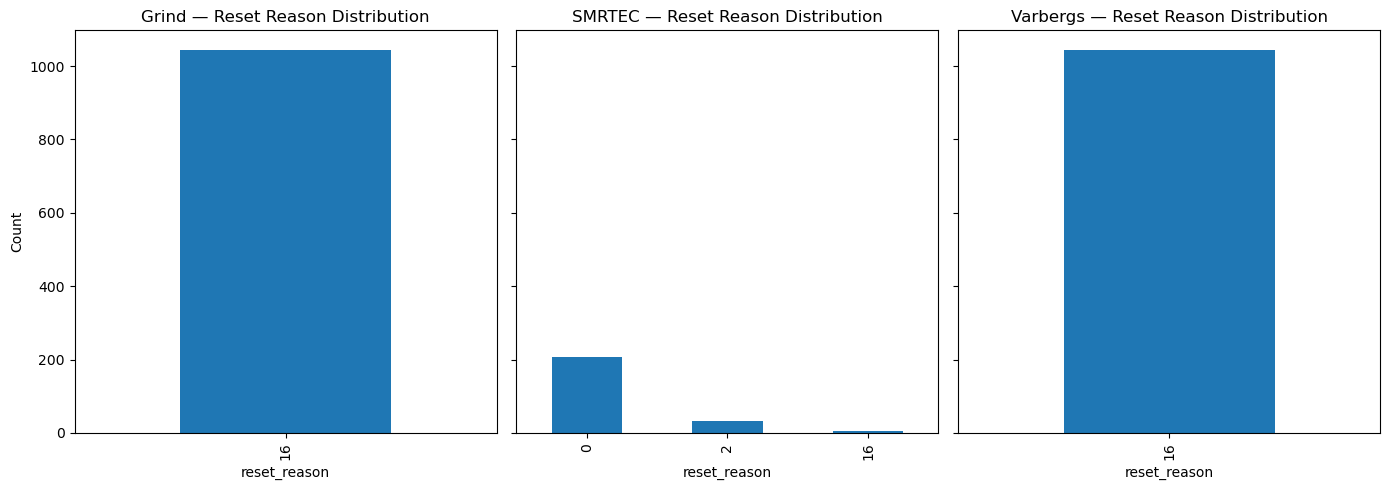

In [181]:
import pandas as pd
import matplotlib.pyplot as plt

# === File paths ===
files = {
    "Grind": "3_enheterna_output_folder/Enhets data - Katarinasstädtjänst Enhet Grind _combined.csv",
    "SMRTEC": "3_enheterna_output_folder/Enhets data - SMRTEC huvudEntre_combined.csv",
    "Varbergs": "3_enheterna_output_folder/Enhets data - Varbergs boxningsklubb_combined.csv",
}

# === Load data ===
dfs = {name: pd.read_csv(path) for name, path in files.items()}

# === Plot distributions from the fixed 'reset_reason' column ===
fig, axes = plt.subplots(1, 3, figsize=(14, 5), sharey=True)

for ax, (name, df) in zip(axes, dfs.items()):
    s = df["reset_reason"].dropna()

    # Try to display numeric codes cleanly; fall back to strings if needed
    try:
        s = s.astype(float).astype(int)
    except Exception:
        s = s.astype(str).str.strip()

    counts = s.value_counts().sort_index()
    counts.plot(kind="bar", ax=ax)

    ax.set_title(f"{name} — Reset Reason Distribution")
    ax.set_xlabel("reset_reason")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()




In [182]:
import pandas as pd

# Load your CSV file
df = pd.read_csv("3_enheterna_output_folder/Enhets data - Varbergs boxningsklubb_combined.csv")

# Create or update the _ack_status column
df['_ack_status'] = df['_ack_timestamp'].apply(lambda x: 0 if pd.notna(x) and str(x).strip() != '' else None)

# Save the updated file
df.to_csv("3_enheterna_output_folder/Enhets data - Varbergs boxningsklubb_combined.csv", index=False)

print("✅ Updated file saved as '")


✅ Updated file saved as '


In [183]:
import pandas as pd

# Load your CSV file
df = pd.read_csv("Enhets data - Varbergs boxningsklubb - Unlock.csv")

# Create or update the _ack_status column
df['_ack_status'] = df['_ack_timestamp'].apply(lambda x: 0 if pd.notna(x) and str(x).strip() != '' else None)

# Save the updated file
df.to_csv("Enhets data - Varbergs boxningsklubb - Unlock.csv", index=False)

print("✅ Updated file saved as '")

✅ Updated file saved as '


In [184]:

import pandas as pd
import matplotlib.pyplot as plt

# File paths
files = {
    "Varbergs": "Enhets data - Varbergs boxningsklubb - Unlock.csv",
    "Grind": "Enhets data - Katarinasstädtjänst Enhet Grind - Unlock_corr.csv",
    "SMRTEC": "Enhets data - SMRTEC huvudEntre - Unlock_corr.csv",
}

# Dictionary to store counts
status_counts = {}

for name, path in files.items():
    df = pd.read_csv(path)
    total = len(df)
    count_0 = (df['_ack_status'] == 0).sum()
    count_nan = df['_ack_status'].isna().sum()
    
    status_counts[name] = {
        '_ack_status=0': count_0,
        '_ack_status=NaN': count_nan,
        'total': total
    }
for name, path in files.items():
    df = pd.read_csv(path)
    total = len(df)
    count_0 = (df['_ack_status'] == 0).sum()
    count_nan = df['_ack_status'].isna().sum()

    status_counts[name] = {
        '_ack_status=0': count_0,
        '_ack_status=NaN': count_nan,
        'total': total
    }

    print(f"{name}: _ack_status=0 → {count_0}, NaN → {count_nan}, total → {total}")







Varbergs: _ack_status=0 → 268, NaN → 154, total → 422
Grind: _ack_status=0 → 0, NaN → 224, total → 1642
SMRTEC: _ack_status=0 → 765, NaN → 40, total → 805


In [185]:
file_path = "Enhets data - Varbergs boxningsklubb - Unlock.csv"  
df = pd.read_csv(file_path)
print(df.columns.tolist())
df.shape
df.info()




['  _id ', ' _uuid ', '_timestamp ', 'rpc   ', '_ack_timestamp', '_ack_status']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0     _id           422 non-null    int64  
 1    _uuid          422 non-null    int64  
 2   _timestamp      422 non-null    object 
 3   rpc             422 non-null    object 
 4   _ack_timestamp  268 non-null    object 
 5   _ack_status     268 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 19.9+ KB


In [193]:
file_path = "Enhets data - Katarinasstädtjänst Enhet Grind - Unlock_corr.csv"  
df = pd.read_csv(file_path)
print(df.columns.tolist())
df.shape
df.info()


['  _id ', ' _uuid ', '_timestamp', 'rpc   ', '_ack_timestamp', '_ack_status']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0     _id           1642 non-null   int64 
 1    _uuid          1642 non-null   int64 
 2   _timestamp      1642 non-null   object
 3   rpc             1642 non-null   object
 4   _ack_timestamp  1418 non-null   object
 5   _ack_status     1418 non-null   object
dtypes: int64(2), object(4)
memory usage: 77.1+ KB


In [187]:
file_path = "Enhets data - SMRTEC huvudEntre - Unlock_corr.csv"  
df = pd.read_csv(file_path)
print(df.columns.tolist())
df.shape
df.info()


['  _id ', ' _uuid ', '_timestamp', 'rpc   ', '_ack_timestamp', '_ack_status']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0     _id           805 non-null    int64  
 1    _uuid          805 non-null    int64  
 2   _timestamp      805 non-null    object 
 3   rpc             805 non-null    object 
 4   _ack_timestamp  765 non-null    object 
 5   _ack_status     765 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 37.9+ KB


In [188]:

df = pd.read_csv("Enhets data - Katarinasstädtjänst Enhet Grind - Unlock_corr.csv")

# Convert _ack_status from object → float64
df['_ack_status'] = pd.to_numeric(df['_ack_status'], errors='coerce')

# Verify the change
print(df['_ack_status'].dtype)
print(df['_ack_status'].head())

float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: _ack_status, dtype: float64


C:\Users\yulia\AppData\Local\Temp\ipykernel_23536\2605996545.py:37: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(["_ack_status = 0", "_ack_status = NaN"], title="Status")


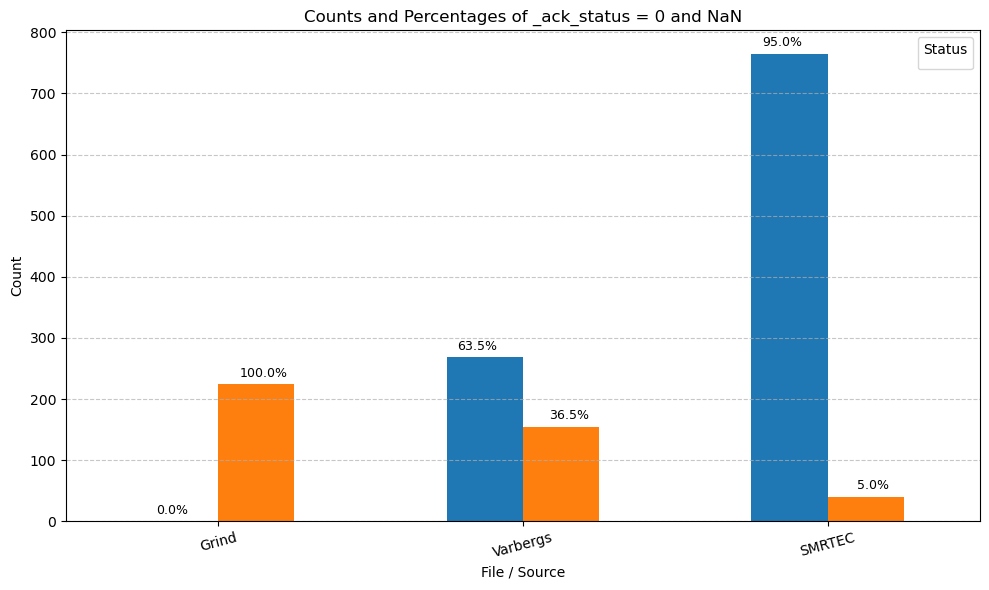

In [190]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
files = {"Grind": "Enhets data - Katarinasstädtjänst Enhet Grind - Unlock_corr.csv",
    "Varbergs": "Enhets data - Varbergs boxningsklubb - Unlock.csv",
    "SMRTEC": "Enhets data - SMRTEC huvudEntre - Unlock_corr.csv"
}

# Dictionary to store counts
status_counts = {}

for name, path in files.items():
    df = pd.read_csv(path)
    total = len(df)
    count_0 = (df['_ack_status'] == 0).sum()
    count_nan = df['_ack_status'].isna().sum()
    
    status_counts[name] = {
        '_ack_status=0': count_0,
        '_ack_status=NaN': count_nan,
        'total': total
    }

# Convert to DataFrame for plotting
counts_df = pd.DataFrame(status_counts).T[[' _ack_status=0','_ack_status=NaN'] if ' _ack_status=0' in status_counts[list(status_counts.keys())[0]] else ['_ack_status=0','_ack_status=NaN']]

# Compute percentages
percentages_df = counts_df.div(counts_df.sum(axis=1), axis=0) * 100

# Plot
ax = counts_df.plot(kind='bar', figsize=(10,6))
plt.title("Counts and Percentages of _ack_status = 0 and NaN")
plt.xlabel("File / Source")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.legend(["_ack_status = 0", "_ack_status = NaN"], title="Status")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add percentage labels on top of bars
for i, (index, row) in enumerate(percentages_df.iterrows()):
    for j, val in enumerate(row):
        count = counts_df.iloc[i, j]
        plt.text(i + (j - 0.5) * 0.3, count + max(counts_df.max()) * 0.01,
                 f"{val:.1f}%", ha='center', va='bottom', fontsize=9)

plt.show()
